In [54]:
from warnings import filterwarnings
filterwarnings('ignore')


In [55]:
#importing all neccesary packages
#setting the style and colour of the plot to be created
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



#### Data Cleaning and Exploratory Analysis

In [56]:
#accessing all datasets and storing them
dataset1= "Att18.xlsx"
dataset2="Att19.xlsx"
dataset3="Drop18.xlsx"
dataset4="Drop19.xlsx"
#reading the datasets using pandas and storing in different dataframes
df1= pd.read_excel(dataset1)
df2= pd.read_excel(dataset2)
df3= pd.read_excel(dataset3)
df4= pd.read_excel(dataset4)
#joining all dataframes into one
dataframe=[df1,df2,df3,df4]
df=pd.concat(dataframe, ignore_index=True, sort =False)


In [57]:
df.head()

,S.No.,Expert Group,Section Code,Reference No.,Course Code,Course Description,Course Type,Program Type,Start Date,End Date,...,Superior Designation,Superior level,Training Coordinator,Program Director,BHR P.No.,BHR Name,Status,Call Count,Pass/Fail,Unnamed: 0
0,1,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,26-04-2017,26-04-2017,...,NaN,NaN,Vishal Goyal,Gauri Shankar Tiwary,163529.0,Mitchell Savio Hembram,Attended,1.0,NaN,NaN
1,2,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,26-04-2017,26-04-2017,...,NaN,NaN,Basant Kumar Singh,Gauri Shankar Tiwary,197083.0,Arpit Agarwal,Attended,1.0,NaN,NaN
2,3,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,26-04-2017,26-04-2017,...,NaN,NaN,Saheb Ram Mahto,Gauri Shankar Tiwary,197834.0,Maradana Rajesh,Attended,1.0,NaN,NaN
3,4,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,26-04-2017,26-04-2017,...,NaN,NaN,Mrinal Kanti Khan,Gauri Shankar Tiwary,163529.0,Mitchell Savio Hembram,Attended,1.0,NaN,NaN
4,5,RM,SUK,SKL0011702,SKL001,O.E.M. Training to Dumper Operator of Vendors,Request,Other Program,05-04-2017,06-04-2017,...,NaN,NaN,MD KALIM,MD KALIM,163519.0,Swarup Prakash Sahoo,Attended,1.0,NaN,NaN


In [58]:
df.isnull().sum()

S.No.                       0
Expert Group                0
Section Code                0
Reference No.               0
Course Code                 0
Course Description          0
Course Type                 0
Program Type             9294
Start Date                  0
End Date                    0
No. of Days                 0
Agency                      0
Nomination Source       23107
Gender                      0
Age                         1
Designation              1166
Grade / Level             151
Category                    0
Cadre                   19425
Executive Head             25
Group                    4133
Department                 41
Section                  5830
Employee Location           0
Superior P.No.          78964
Superior Name           78964
Superior Designation    78991
Superior level          78964
Training Coordinator    18362
Program Director           11
BHR P.No.                9773
BHR Name                 9773
Status                      0
Call Count

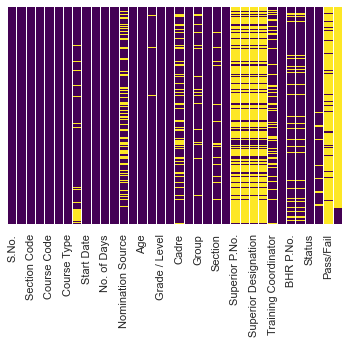

In [59]:
#showing the attributes that have missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

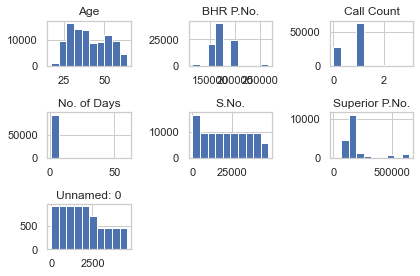

In [60]:
#these plots are to see the varaition in data
df.hist()
plt.tight_layout()
plt.show()


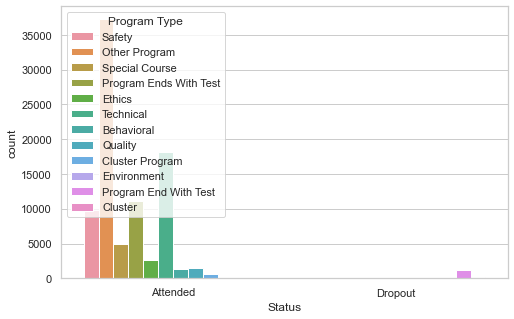

In [61]:
#count-plot of people who attended based on course type
plt.figure(figsize=(8,5)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='Status', hue='Program Type', data=df) 
plt.show()

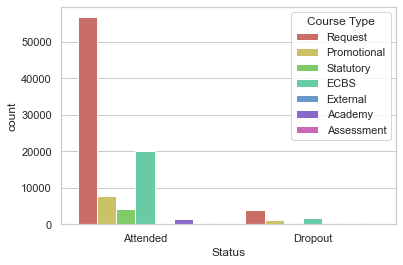

In [62]:
#count-plot of people who attended based on course type
sns.countplot(x='Status', hue='Course Type', data=df, palette='hls')


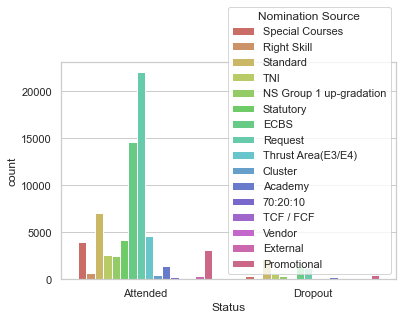

In [63]:
sns.countplot(x='Status', hue='Nomination Source', data=df, palette='hls')

In [64]:
df['Status'].value_counts()

Attended    90871
Dropout      7140
Name: Status, dtype: int64

The following attributes were chosen in accordance wth my analysis above such as 'Superior Name', 'Pass/Fail' and others after talking to my supervisor such as name.

In [65]:
to_drop= ['S.No.','Start Date','End Date','Superior Designation','Superior level', 'Training Coordinator','Cadre','Superior P.No.', 'Superior Name', 'BHR P.No.', 'BHR Name', 'Pass/Fail', 'Unnamed: 0', 'Call Count']
df.drop(to_drop, inplace=True, axis=1)

In [66]:
df.head()

,Expert Group,Section Code,Reference No.,Course Code,Course Description,Course Type,Program Type,No. of Days,Agency,Nomination Source,...,Designation,Grade / Level,Category,Executive Head,Group,Department,Section,Employee Location,Program Director,Status
0,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,1,PTI,Special Courses,...,SDL CREW,PB 01,WRK,Raw Materials,Jamadoba Group,Digwadih Colliery,Operations Digwadih,Jharia,Gauri Shankar Tiwary,Attended
1,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,1,PTI,Special Courses,...,SDL CREW,MC 01,SUP,Raw Materials,Jamadoba Group,6&7 Pits Colliery,Operations 6&7 Pits,Jharia,Gauri Shankar Tiwary,Attended
2,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,1,PTI,Special Courses,...,BANKSMAN,DC 04,WRK,Raw Materials,Sijua Group,Bhelatand Colliery,Operations Bhelatand,Jharia,Gauri Shankar Tiwary,Attended
3,RM,JBD,PJEE181701,PJEE18,Electrical Safety and SDL Trailing Cable handling,Request,Safety,1,PTI,Special Courses,...,SDL CREW,PM 01,WRK,Raw Materials,Jamadoba Group,Sijua Colliery,Operations Digwadih,Jharia,Gauri Shankar Tiwary,Attended
4,RM,SUK,SKL0011702,SKL001,O.E.M. Training to Dumper Operator of Vendors,Request,Other Program,2,VTC,Right Skill,...,SENIOR MACK OPERATOR,VRO08,WRK,Raw Materials,FAM,Sukinda Chromite Mine,Mining Operation,Sukinda,MD KALIM,Attended


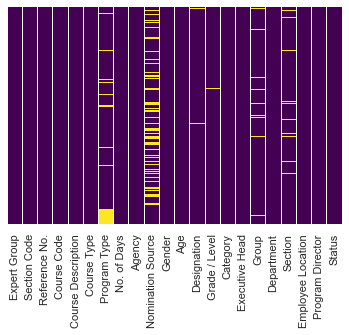

In [67]:
#showing the attributes that have missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [68]:
#df.drop(['Course Type', 'Program Type', 'Agency', 'Gender', 'Category'], inplace=True, axis=1)

In [69]:
df.dtypes


Expert Group           object
Section Code           object
Reference No.          object
Course Code            object
Course Description     object
Course Type            object
Program Type           object
No. of Days             int64
Agency                 object
Nomination Source      object
Gender                 object
Age                   float64
Designation            object
Grade / Level          object
Category               object
Executive Head         object
Group                  object
Department             object
Section                object
Employee Location      object
Program Director       object
Status                 object
dtype: object

In [70]:
df.isnull().sum()

Expert Group              0
Section Code              0
Reference No.             0
Course Code               0
Course Description        0
Course Type               0
Program Type           9294
No. of Days               0
Agency                    0
Nomination Source     23107
Gender                    0
Age                       1
Designation            1166
Grade / Level           151
Category                  0
Executive Head           25
Group                  4133
Department               41
Section                5830
Employee Location         0
Program Director         11
Status                    0
dtype: int64

I used Label encoders to make model implementation easy. 

In [71]:
#Encode target labels with value between 0 and n_classes-1.
le = LabelEncoder()
#use of label encoder 

In [72]:
df['Program Type'] = le.fit_transform(df['Program Type'].astype(str))
df['Designation'] = le.fit_transform(df['Designation'].astype(str))
df['Grade / Level'] = le.fit_transform(df['Grade / Level'].astype(str))
df['Executive Head'] = le.fit_transform(df['Executive Head'].astype(str))
df['Group'] = le.fit_transform(df['Group'].astype(str))
df['Department'] = le.fit_transform(df['Department'].astype(str))
df['Section'] = le.fit_transform(df['Section'].astype(str))
df['Program Director'] = le.fit_transform(df['Program Director'].astype(str))
df['Nomination Source'] = le.fit_transform(df['Nomination Source'].astype(str))

# Using Label Encoder to convert the categorical data to Numeric Data

In [73]:
# apply "le.fit_transform"
df_encoded = df.apply(le.fit_transform)
print(df_encoded)

       Expert Group  Section Code  Reference No.  Course Code  \
0                10            10           2712          568   
1                10            10           2712          568   
2                10            10           2712          568   
3                10            10           2712          568   
4                10            26           3826          862   
...             ...           ...            ...          ...   
98006             8             5           1549          218   
98007             0             4           4665         1023   
98008             0             2           3599          802   
98009             4            13           4773         1085   
98010             4            13           4759         1083   

       Course Description  Course Type  Program Type  No. of Days  Agency  \
0                     311            5             9            0       9   
1                     311            5             9            0

In [74]:
df = df_encoded.reindex(np.random.permutation(df_encoded.index))
df.head

<bound method NDFrame.head of        Expert Group  Section Code  Reference No.  Course Code  \
95296             1            24           4581         1000   
81879             9            23           1086          193   
58057             4            14           1952          321   
78520             2             9            514          131   
33738            10            10           3054          652   
...             ...           ...            ...          ...   
50196             2             9            495          119   
84546             2             9            509          126   
1859              8             5           3746          828   
2286              1            24            194           78   
4817              2             9            459          119   

       Course Description  Course Type  Program Type  No. of Days  Agency  \
95296                 992            2            12            0      11   
81879                 295          

# Logistic Regression Model

In [75]:
x = df.drop('Status', axis=1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1) 
#test and train sets created to be tested
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
#training my model using train sets


LogisticRegression()

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

The classification report displays the Precision, Recall , F1  and Support scores for the model.

In [77]:
#Precision score means the the level up-to which the prediction made by the model is precise.
#Recall is the amount up-to which the model can predict the outcome.
#F1 and Support scores are the amount of data tested for the predictions.
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     29964
           1       0.12      0.00      0.00      2380

    accuracy                           0.93     32344
   macro avg       0.52      0.50      0.48     32344
weighted avg       0.87      0.93      0.89     32344

[[29941    23]
 [ 2377     3]]
0.9257976749938165
Accuracy: 0.9257976749938165
Precision: 0.11538461538461539
Recall: 0.0012605042016806723


The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. This model is okay.

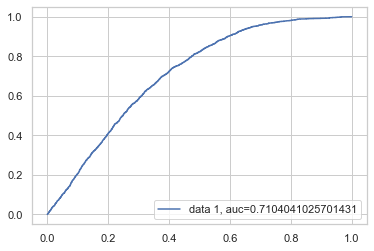

In [78]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree Model

In [79]:
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [81]:
#Defining Features and lables
features= list(df.columns)
features.remove('Status')

In [82]:
X = df.drop('Status', axis=1)
Y = df['Status']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [83]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
model.score(X_test, y_test)

0.9958679793909095

In [85]:
predictions_2 = model.predict(X_test)
print(classification_report(y_test, predictions_2))
print(confusion_matrix(y_test, predictions_2))
print(accuracy_score(y_test, predictions_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18190
           1       0.97      0.97      0.97      1413

    accuracy                           1.00     19603
   macro avg       0.99      0.98      0.98     19603
weighted avg       1.00      1.00      1.00     19603

[[18152    38]
 [   43  1370]]
0.9958679793909095


In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_2))
print("Precision:",metrics.precision_score(y_test, predictions_2))
print("Recall:",metrics.recall_score(y_test, predictions_2))

Accuracy: 0.9958679793909095
Precision: 0.9730113636363636
Recall: 0.9695682944090588


The data above tell us how accurate the model is. The plot below is a ROC curve that plots true positive rate (TPR) against the false positive rate (FPR). The closer the curve is to a 45* angle i.e cut the graph in half, the less accurate it is. 

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [88]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

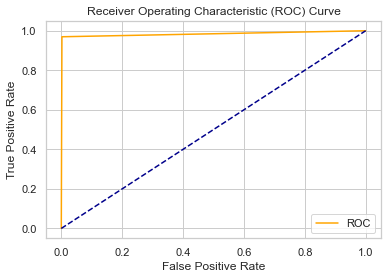

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_2)
plot_roc_curve(fpr, tpr)

This model is better.